[행정동별거주인구_20년도2분기](https://data.seoul.go.kr/dataList/10727/S/2/datasetView.do#none)

위 사이트는 분기나 년 단위로만 제공함

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc,style
import seaborn as sns
style.use('ggplot')
plt.rc('font',family='AppleGothic')
plt.rc('axes', unicode_minus=False)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
dong_pop = pd.read_csv('행정동별거주인구.txt',sep='\t')

In [6]:
dong_pop.columns

Index(['기간', '자치구', '동', '구분', '계', '0~4세', '5~9세', '10~14세', '15~19세',
       '20~24세', '25~29세', '30~34세', '35~39세', '40~44세', '45~49세', '50~54세',
       '55~59세', '60~64세', '65~69세', '70~74세', '75~79세', '80~84세', '85~89세',
       '90~94세', '95~99세', '100세 이상+'],
      dtype='object')

In [19]:
# 초등학생 나이대만 보기
under_20 = dong_pop[['자치구', '동', '구분', '계', '5~9세', '10~14세']]
under_20

,자치구,동,구분,계,5~9세,10~14세
0,합계,합계,계,"9,985,652","367,054","374,594"
1,합계,합계,한국인,"9,720,846","360,318","370,357"
2,합계,합계,외국인,"264,806","6,736","4,237"
3,종로구,소계,계,"160,520","4,717","5,202"
4,종로구,소계,한국인,"150,383","4,550","5,091"
...,...,...,...,...,...,...
1348,강동구,천호2동,한국인,"34,853",874,835
1349,강동구,천호2동,외국인,789,32,14
1350,강동구,길동,계,"46,950","1,431","1,367"
1351,강동구,길동,한국인,"46,619","1,421","1,360"


In [ ]:
under_20

In [20]:
# 20세 미만 동별 한국인외국인 합계로 보기
und_20 = under_20[(under_20.자치구 != '합계')&(under_20.동 != '합계')&(under_20.동 != '소계')&(under_20.구분 == '계')].reset_index(drop=True)
und_20

,자치구,동,구분,계,5~9세,10~14세
0,종로구,사직동,계,"9,787",368,347
1,종로구,삼청동,계,"2,973",82,122
2,종로구,부암동,계,"10,421",363,442
3,종로구,평창동,계,"18,696",708,717
4,종로구,무악동,계,"8,691",436,484
...,...,...,...,...,...,...
420,강동구,둔촌1동,계,274,6,5
421,강동구,둔촌2동,계,"27,292","1,064",996
422,강동구,암사1동,계,"36,254","1,238","1,230"
423,강동구,천호2동,계,"35,642",906,849


In [32]:

und_20['계'] =  und_20['계'].apply(lambda x : int(x.replace(',','')))
und_20['5~9세'] =  und_20['5~9세'].apply(lambda x : int(x.replace(',','')))
und_20['10~14세'] =  und_20['10~14세'].apply(lambda x : int(x.replace(',','')))


In [33]:
# 연령대 합산 및 비율
all_tmp = []
for i in range(len(und_20)):
    all_tmp.append(sum(und_20.iloc[i].tolist()[4:]))
und_20['5~14세'] = all_tmp
und_20['아동 비율'] = und_20['5~14세'] / und_20['계']

In [40]:
und_20

,자치구,동,구분,계,5~9세,10~14세,5~14세,아동 비율
0,종로구,사직동,계,9787,368,347,715,0.073056
1,종로구,삼청동,계,2973,82,122,204,0.068618
2,종로구,부암동,계,10421,363,442,805,0.077248
3,종로구,평창동,계,18696,708,717,1425,0.076220
4,종로구,무악동,계,8691,436,484,920,0.105857
...,...,...,...,...,...,...,...,...
420,강동구,둔촌1동,계,274,6,5,11,0.040146
421,강동구,둔촌2동,계,27292,1064,996,2060,0.075480
422,강동구,암사1동,계,36254,1238,1230,2468,0.068075
423,강동구,천호2동,계,35642,906,849,1755,0.049240


In [100]:
und_20.to_pickle('행정동별_5-14세_거주인구.pkl')

In [97]:
# 전체 구별 현황 그래프
def plot_region(df, x_axis, rc, rot_x=True, show_xlabel=True):
    plt.figure(figsize=(18, 6))

    pal = sns.color_palette("Blues_r", df.shape[0])
    rank = df['아동_인구_수'].argsort().argsort()
    sns.barplot(x=x_axis, y='아동_인구_수', data=df, palette=np.array(pal[::-1])[rank])
    plt.axhline(0.075, color='red', alpha=0.5, label=f'서울시 구별 아동 인구 {rc}')
    for idx, score in enumerate(df['아동_인구_수']):
        plt.text(idx-0.4, score+0.003, score, size=10, weight='bold')
    plt.title(f'서울시 {x_axis}별 5~14세 인구 {rc}', size=25)
    plt.legend(fontsize=15)
    plt.ylabel(f'5~14세 {x_axis} 인구 {rc}', size=15)
    if rot_x:
        plt.xticks(rotation=45, size=15, ha='right')
    if show_xlabel:
        plt.xlabel(x_axis, size=15)
    else:
        plt.xlabel(None)

    plt.show()  

In [70]:
52011 / 546158

0.0952306841609937

In [71]:
und_20_gu = und_20.groupby(['자치구'],as_index=False).sum()
und_20_gu['아동 비율'] = und_20_gu['5~14세'] / und_20_gu['계']
und_20_gu

,자치구,계,5~9세,10~14세,5~14세,아동 비율
0,강남구,546158,23437,28574,52011,0.095231
1,강동구,461547,19485,19087,38572,0.083571
2,강북구,315395,9647,10162,19809,0.062807
3,강서구,593203,22972,21532,44504,0.075023
4,관악구,516318,13325,13198,26523,0.051370
5,광진구,363925,11905,12357,24262,0.066668
6,구로구,436707,16703,15164,31867,0.072971
7,금천구,250554,7618,7085,14703,0.058682
8,노원구,533041,20366,24383,44749,0.083950
9,도봉구,331744,11298,11788,23086,0.069590


In [101]:
und_20_gu.to_pickle('자치구별_5-14세_거주인구.pkl')

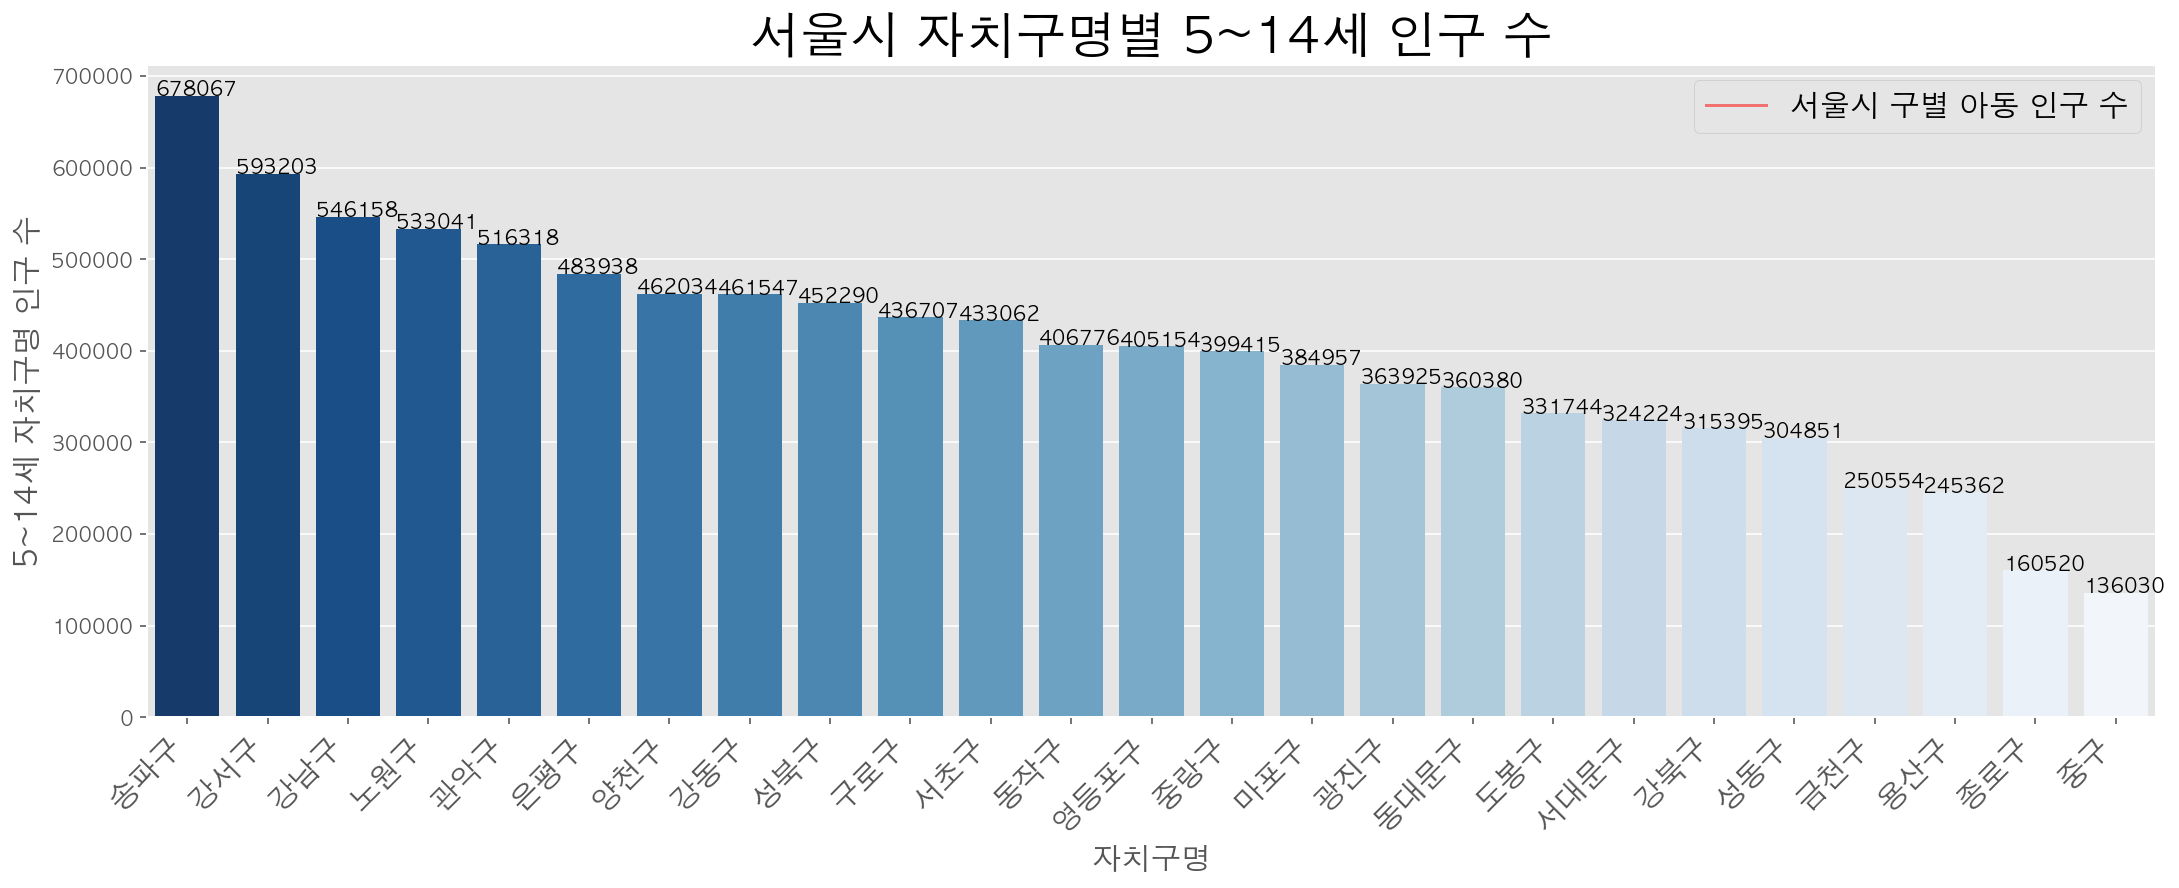

In [98]:
tmp_list = []

for gu in und_20_gu['자치구'].unique():
    tmp_df = und_20_gu[und_20_gu['자치구']==gu]
    tmp_list.append(tmp_df['계'].values[0])

pop_gu = pd.DataFrame({'자치구명':und_20_gu['자치구'].unique(), '아동_인구_수':tmp_list})\
                        .sort_values('아동_인구_수', ascending=False).reset_index(drop=True)

plot_region(pop_gu,'자치구명', '수')


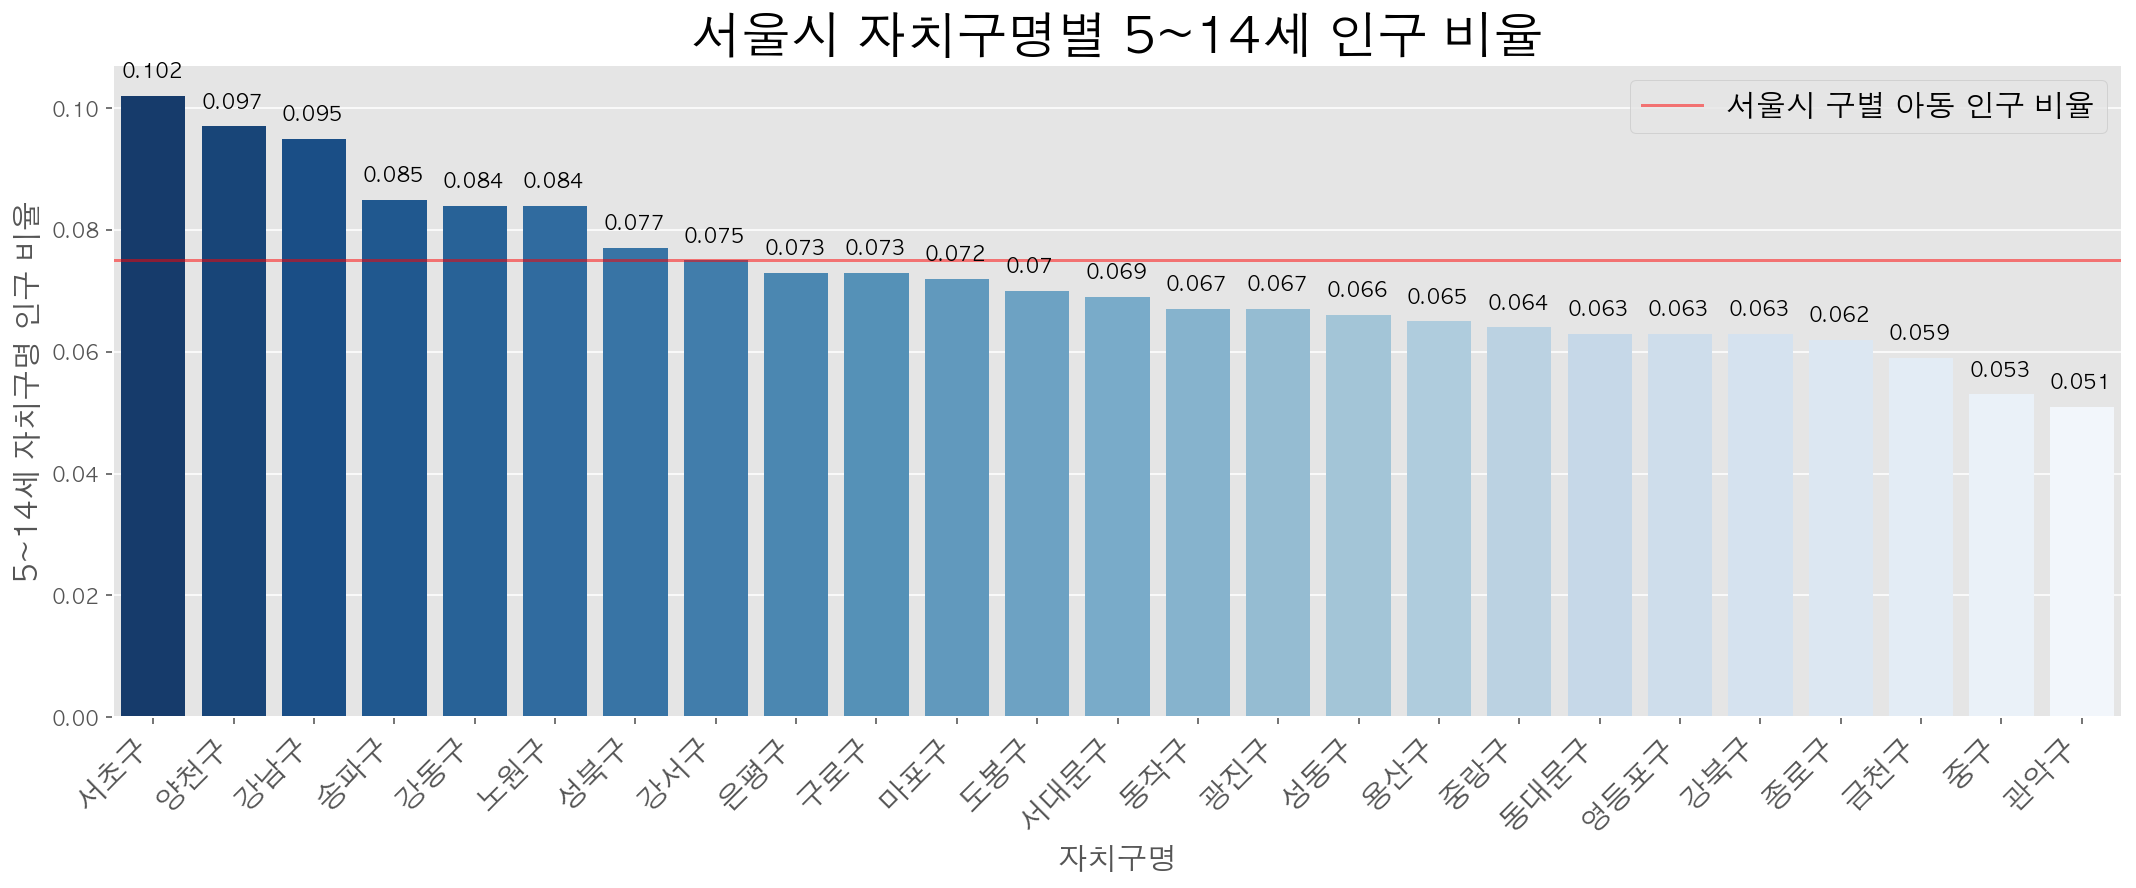

In [99]:
tmp_list = []

for gu in und_20_gu['자치구'].unique():
    tmp_df = und_20_gu[und_20_gu['자치구']==gu]
    tmp_list.append(round(tmp_df['아동 비율'].values[0],3))

pop_gu = pd.DataFrame({'자치구명':und_20_gu['자치구'].unique(), '아동_인구_수':tmp_list})\
                        .sort_values('아동_인구_수', ascending=False).reset_index(drop=True)

plot_region(pop_gu,'자치구명','비율')

In [60]:
und_20

,자치구,동,구분,계,5~9세,10~14세,5~14세,아동 비율
0,종로구,사직동,계,9787,368,347,715,0.073056
1,종로구,삼청동,계,2973,82,122,204,0.068618
2,종로구,부암동,계,10421,363,442,805,0.077248
3,종로구,평창동,계,18696,708,717,1425,0.076220
4,종로구,무악동,계,8691,436,484,920,0.105857
...,...,...,...,...,...,...,...,...
420,강동구,둔촌1동,계,274,6,5,11,0.040146
421,강동구,둔촌2동,계,27292,1064,996,2060,0.075480
422,강동구,암사1동,계,36254,1238,1230,2468,0.068075
423,강동구,천호2동,계,35642,906,849,1755,0.049240


In [90]:
# 동별 현황 그래프
def plot_dong_region(gu, x_axis, rot_x=True, show_xlabel=True):

    pop_tmp = und_20[(und_20['자치구'] == f'{gu}')].reset_index(drop=True)
    tmp_list = []
    for dong in pop_tmp['동'].unique():
        tmp_df = pop_tmp[pop_tmp['동']==dong]
        tmp_list.append(round(tmp_df['아동 비율'].values[0],3))

    pop_dong = pd.DataFrame({'자치동명':pop_tmp['동'].unique(), '아동_인구_수':tmp_list})\
                        .sort_values('아동_인구_수', ascending=False).reset_index(drop=True)
    
    plt.figure(figsize=(18, 6))

    pal = sns.color_palette("Greens_r", pop_dong.shape[0])
    rank = pop_dong['아동_인구_수'].argsort().argsort()
    sns.barplot(x=x_axis, y='아동_인구_수', data=pop_dong, palette=np.array(pal[::-1])[rank])
    plt.axhline(0.075, color='red', alpha=0.5, label=f'서울시 {gu} 동별 5~14세 인구 비율')
    for idx, score in enumerate(pop_dong['아동_인구_수']):
        plt.text(idx-0.4, score+0.003, score, size=10, weight='bold')
    plt.title(f'서울시 {gu} {x_axis}별 5~14세 인구 비율', size=25)
    plt.legend(fontsize=15)
    plt.ylabel(f'5~14세 {x_axis} 인구 비율', size=15)
    if rot_x:
        plt.xticks(rotation=45, size=15, ha='right')
    if show_xlabel:
        plt.xlabel(x_axis, size=15)
    else:
        plt.xlabel(None)

    plt.show()

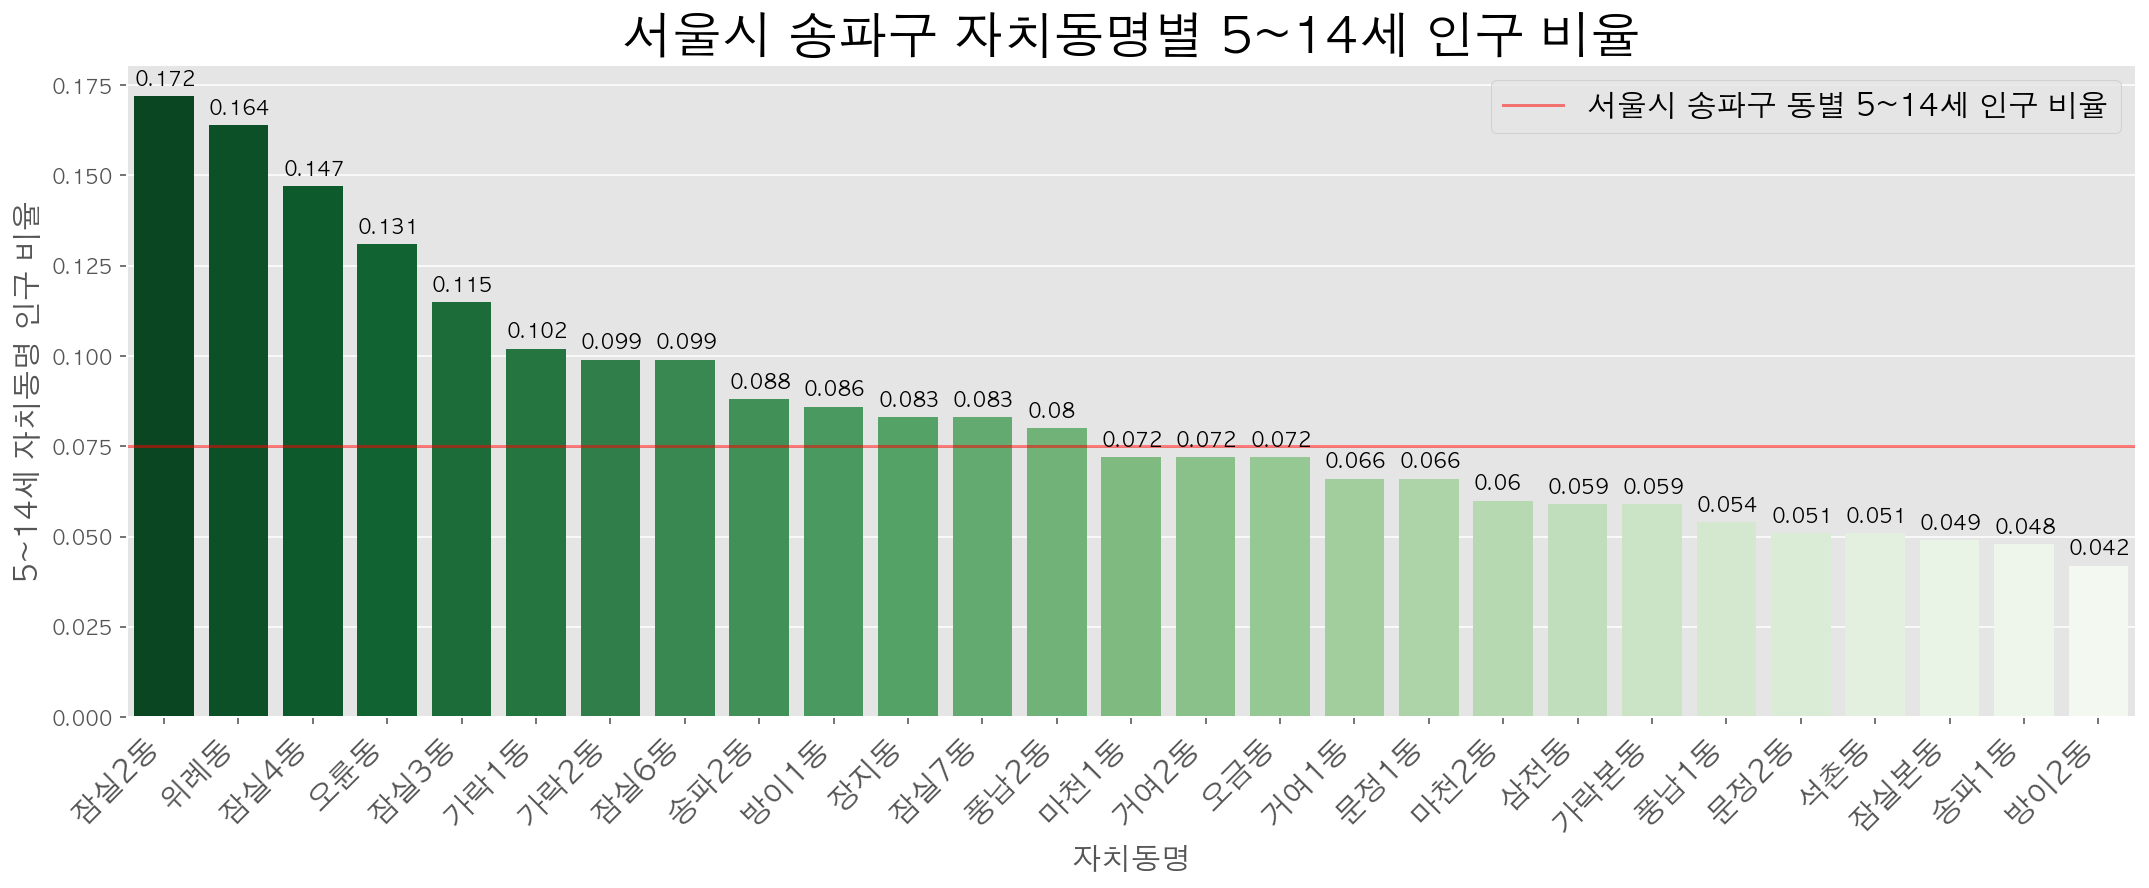

In [91]:
plot_dong_region('송파구', '자치동명')